In [1]:
# Task 3

### Question 3.1 - How would you measure diversity?

First we look into the question, how we can measure the diversity of a subset of different answers. To calculate the diversity, we need to differentiate two types of answers: _categorical_ and _continuous_.

An example for a categorical column is gender. We can measure the diversity in this case with the _entropy_ measure. Since entropy measures how spread out or balanced the selected values are, it is ideal. In the end we want to normalize the entropy to account for classes that are not in the selected subset.

For continuous data columns like _age_ we can measure the diversity using the _standard deviation_. We could also use the _entropy_ and treat every age as a separate class. However, this would mean that we don't account for the absolute age difference between workers, just for different ages. We therefore decided that the standard deviation is the better metric.
To get a score in-between 0 and 1, it has to be normalized: The std. deviation of the subset is divided by the std. deviation of the maximum possible std. deviation of the full dataset. This is done by calculating the difference of the maximum and minimum values of the original dataset and then dividing it by two.

In the end we calculate our total diversity score by calculating the diversity of each relevant column and then generating their mean.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import entropy


Excerpt of the original dataframe:

In [3]:
df = pd.read_csv('../../data/answerList_data.csv')
df['correctness'] = (((df['GroundTruth'] == 0.0) & (df['Answer.option'] == 'NO')) | (
        (df['GroundTruth'] == 1.0) & (df['Answer.option'] == 'YES'))).astype(int)

df

,Answer.ID,FailingMethod,Question.ID,Answer.duration,Answer.confidence,Answer.difficulty,GroundTruth,TP,TN,FN,...,Worker.ID,Worker.score,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage,correctness
0,261,HIT01_8,0,90.984,4,2,0,0,1,0,...,832cg-7G1i-462:73eI-8E-2g-985,5,Undergraduate_Student,7.0,21,Male,High School,United States,Java; C++; C#,1
1,262,HIT01_8,0,133.711,5,1,0,0,1,0,...,98ce7A-4i-507,4,Undergraduate_Student,10.0,25,Female,High School;University;Web,United States,c#,1
2,263,HIT01_8,0,77.696,5,2,0,0,1,0,...,881AC0I2E-625:135cI3E-7e8-86,5,Professional_Developer,7.0,24,Male,High School;University;Web,United States,C++;Java;PHP,1
3,264,HIT01_8,0,46.644,1,1,0,0,1,0,...,270eG-5c6A3-46:65eI-2i-2I-9-36,5,Professional_Developer,20.0,38,Male,High School;University;Other On the job,USA,C#,1
4,265,HIT01_8,0,215.416,5,5,0,0,1,0,...,844Cg1g5e1-17:255ei-8G8E85-8,3,Undergraduate_Student,5.0,19,Male,High School;University;Web,United States,C++; Java,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2316,HIT08_54,128,220.420,2,4,0,0,1,0,...,1171ea-4g-6C-73-8,3,Graduate_Student,2.0,28,Male,University,USA,C#,1
2576,2317,HIT08_54,128,322.790,4,3,0,0,0,0,...,66AC-5a0g-47-9:1443IA-7C-6e967,5,Professional_Developer,17.0,39,Male,University;Web,USA,C#; VB.NET; Java,0
2577,2318,HIT08_54,128,159.530,5,1,0,0,1,0,...,106iG8G-9I-9-80:590CG-6G-7i-71-9,4,Professional_Developer,10.0,31,Male,High School;University;Web;Other work,usa,C++,1
2578,2319,HIT08_54,128,68.578,5,1,0,0,1,0,...,1221iC8A5A242:495CC9e6a691:11aE2c-4c-9-86,4,Undergraduate_Student,4.0,19,Male,University;Web;Other FIRST Robotics,United States,C++,1


For our analysis we pick the Failing Method "HIT01_8" and look at question no. 1.
We then filter out incorrect answers and are left with 12 correct answers, given to question 1.

In [4]:
df_question_1 = df[df['Question.ID'] == 1]
df_question_1_correct = df_question_1[df_question_1['correctness'] == 1]

df_question_1_correct

,Answer.ID,FailingMethod,Question.ID,Answer.duration,Answer.confidence,Answer.difficulty,GroundTruth,TP,TN,FN,...,Worker.ID,Worker.score,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage,correctness
20,441,HIT01_8,1,140.407,4,3,1,1,0,0,...,35Eg-6i-8G-2-6-8,3,Undergraduate_Student,3.0,49,Female,University,US,php,1
22,443,HIT01_8,1,112.409,5,2,1,1,0,0,...,286Ig-9C0E170,5,Undergraduate_Student,5.0,20,Male,University;Web,USA,c#,1
23,444,HIT01_8,1,76.418,5,1,1,1,0,0,...,1221iC8A5A242:495CC9e6a691:11aE2c-4c-9-86,4,Undergraduate_Student,4.0,19,Male,University;Web;Other FIRST Robotics,United States,C++,1
24,445,HIT01_8,1,261.928,5,2,1,1,0,0,...,555aC0a8e4-8-3:535CE8A-5e-95-2,3,Graduate_Student,1.0,25,Female,University,USA,java,1
25,446,HIT01_8,1,236.045,5,1,1,1,0,0,...,815aA-9g-4e44-8:182Ae3g-6i-30-5,5,Professional_Developer,5.0,29,Male,University;Other On the job,USA,Python; SQL; Java,1
27,448,HIT01_8,1,259.790,3,3,1,1,0,0,...,78cA-9e4a2-6-7,5,Hobbyist,1.0,30,Female,University,united states,none,1
28,449,HIT01_8,1,230.142,4,3,1,1,0,0,...,1449GA0I-4C14-1,4,Undergraduate_Student,4.0,35,Male,High School,USA,php and C++,1
29,450,HIT01_8,1,253.302,4,2,1,1,0,0,...,41eI0e3i-806:568Ae7g8c-7-1-2,5,Hobbyist,4.0,35,Male,University;Web;Other MOOC,USA,Java Python,1
30,451,HIT01_8,1,89.521,4,3,1,1,0,0,...,1523iA8C4C-602,5,Professional_Developer,14.0,34,Male,High School;University;Web;Other books,Russia,C++;Object Pascal,1
34,455,HIT01_8,1,161.419,4,4,1,1,0,0,...,1573Ic-9c3a-7-13,5,Graduate_Student,2.0,24,Male,University,India,c; c++,1


For demonstration we can print the gender diversity and its normalized value of all picked answers compared to the full dataset:

```python
def categorical_diversity(series):
    counts = series.value_counts(normalize=True)
    return entropy(counts, base=2)


def categorical_diversity_norm(series, series_full):
    k = series_full.nunique()
    return categorical_diversity(series) / (np.log2(k) if k > 1 else 1)
```

In [5]:
def categorical_diversity(series):
    counts = series.value_counts(normalize=True)
    return entropy(counts, base=2)


def categorical_diversity_norm(series, series_full):
    k = series_full.nunique()
    return categorical_diversity(series) / (np.log2(k) if k > 1 else 1)


gender_diversity = categorical_diversity(df_question_1_correct['Worker.gender'])
gender_diversity_norm = categorical_diversity_norm(df_question_1_correct['Worker.gender'], df['Worker.gender'])

print('Gender diversity of all answers:', gender_diversity)
print('Normalized gender diversity', gender_diversity_norm)

Gender diversity of all answers: 0.8112781244591328
Normalized gender diversity 0.5118595071429148


For continuous variables, we use the following method:
```python
def coefficient_variation(series, series_full):
    if len(series) < 2:
        return 0
    return series.std() / ((series_full.max() - series_full.min()) / 2)
````

For demonstration purposes we print the age diversity of all picked answers compared to the full dataset:

In [6]:
def coefficient_variation(series, series_full):
    if len(series) < 2:
        return 0
    return series.std() / ((series_full.max() - series_full.min()) / 2)

age_diversity = coefficient_variation(df_question_1_correct['Worker.age'], df['Worker.age'])

print('Normalized age diversity', age_diversity)

Normalized age diversity 0.3035038076373404


In [7]:
def combined_diversity_score(df_selection, df_all, categorical_cols, continuous_cols):
    total_number_cols = len(categorical_cols) + len(continuous_cols)


    categorical_score = sum(1 / total_number_cols * categorical_diversity_norm(df_selection[col], df_all[col]) for col in categorical_cols)
    continuous_score = sum(1 / total_number_cols * coefficient_variation(df_selection[col], df_all[col]) for col in continuous_cols)

    return categorical_score + continuous_score

def list_diversity_scores(df_selection, df_all, categorical_cols, continuous_cols):
    total_number_cols = len(categorical_cols) + len(continuous_cols)

    categorical_scores = [1 / total_number_cols * categorical_diversity_norm(df_selection[col], df_all[col]) for col in categorical_cols]
    continuous_scores = [1 / total_number_cols * coefficient_variation(df_selection[col], df_all[col]) for col in continuous_cols]

    return categorical_scores + continuous_scores

For our analysis, we chose the following categorical columns
- Worker.profession
- Worker.gender

and the following continuous columns
- Worker.age
- Worker.yearsOfExperience

To combine multiple factors into a single diversity score, we take both categorical and continous columns, give each an equal weight and sum them up.
The diversity score is then normalized by the number of factors.

The combined diversity score of our picked answers compared to the full dataset:

In [8]:
categorical_cols = ['Worker.profession', 'Worker.gender']
continuous_cols = ['Worker.yearsOfExperience', 'Worker.age']

diversity_score = combined_diversity_score(df_question_1_correct, df, categorical_cols, continuous_cols)

print('Combined Diversity', diversity_score)

Combined Diversity 0.4759271292774812


In [9]:
def select_n(df, n):
    return df.sample(n=n)

In [10]:
for n in range(1, 10):
    sample_df = select_n(df_question_1_correct, n)
    div_scores = list_diversity_scores(sample_df, df_question_1_correct, categorical_cols, continuous_cols)
    print('Sample df\n', sample_df[categorical_cols+continuous_cols])
    print('Diversity score\n', div_scores)
    print('Total diversity score', combined_diversity_score(sample_df, df_question_1_correct, categorical_cols, continuous_cols))
    print('\n\n')


Sample df
    Worker.profession Worker.gender  Worker.yearsOfExperience  Worker.age
29          Hobbyist          Male                       4.0          35
Diversity score
 [np.float64(0.0), np.float64(0.0), 0.0, 0.0]
Total diversity score 0.0



Sample df
         Worker.profession Worker.gender  Worker.yearsOfExperience  Worker.age
24       Graduate_Student        Female                       1.0          25
28  Undergraduate_Student          Male                       4.0          35
Diversity score
 [np.float64(0.125), np.float64(0.25), np.float64(0.044194173824159216), np.float64(0.11785113019775792)]
Total diversity score 0.5370453040219172



Sample df
         Worker.profession Worker.gender  Worker.yearsOfExperience  Worker.age
28  Undergraduate_Student          Male                       4.0          35
24       Graduate_Student        Female                       1.0          25
27               Hobbyist        Female                       1.0          30
Diversity score
 [

### Subsets

We are now going to look at subsets of the 12 previously picked answers.
We will evaluate these subset according to three different measures:
- diversity (regarding in regard to persons)
- readability
- semantic similarity of the subset to our hand-crafted ground truth


In [11]:


ground_truth = "The IF statement in line 279 checks whether minutesOffset is set to a value between 0 and 59. If not, an IllegalArgumentException is thrown. This is a bug because the minutesOffset may also be negative. The IF statement should check for the minutesOffset to be between -59 and 59."

bug_group = df_question_1_correct

To check for similarity, we embed the two sentences to be compared with the model
"all-MiniLM-L6-v2" and use cosine similarity on the transformed embeddings.
```python
def calculate_cosine_similarity(hyp, ref):
    hyp_embedding = model.encode(hyp)
    ref_embedding = model.encode(ref)
    return np.dot(hyp_embedding, ref_embedding) / (np.linalg.norm(hyp_embedding) * np.linalg.norm(ref_embedding))

```

In [12]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')

def calculate_cosine_similarity(hyp, ref, ref_embedding=None):
    hyp_embedding = model.encode(hyp)
    if ref_embedding is None:
        ref_embedding = model.encode(ref)
    return np.dot(hyp_embedding, ref_embedding) / (np.linalg.norm(hyp_embedding) * np.linalg.norm(ref_embedding))


/Users/lucas/PycharmProjects/ASE-GenAI/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


To calculate a readability score, we are using the Flesch Reading Ease formula.

In [13]:
import textstat
def calculate_flesch_reading_ease(text):
    return textstat.flesch_reading_ease(text)

def calculate_automated_readability_index(text):
    return textstat.automated_readability_index(text)

In [14]:
from scipy.stats import entropy

def coefficient_variation(series, series_full):
    if len(series) < 2:
        return 0
    return series.std() / ((series_full.max() - series_full.min()) / 2)

def categorical_diversity(series):
    counts = series.value_counts(normalize=True)
    return entropy(counts, base=2)


def categorical_diversity_norm(series, series_full):
    k = series_full.nunique()
    return categorical_diversity(series) / (np.log2(k) if k > 1 else 1)

def combined_diversity_score(df_selection, df_all, categorical_cols, continuous_cols):
    total_number_cols = len(categorical_cols) + len(continuous_cols)


    categorical_score = sum(1 / total_number_cols * categorical_diversity_norm(df_selection[col], df_all[col]) for col in categorical_cols)
    continuous_score = sum(1 / total_number_cols * coefficient_variation(df_selection[col], df_all[col]) for col in continuous_cols)

    return categorical_score + continuous_score

Since the full dataset of answers is relatively small (12), we can search through all possible subsets of lengths 1 to 12 and compare their scores in all three categories. Below are the number of combinations to check for a subset of size `n`

In [15]:
# use itertools to get all possible subsets of bug_group rows
import itertools

def get_subsets(df):
    for i in range(1, len(df) + 1):
        amount = 0
        for subset in itertools.combinations(df.iterrows(), i):
            amount += 1;
            yield df.loc[[x[0] for x in subset]]

all_subsets = list(get_subsets(bug_group))

In [16]:
categorical_cols = ['Worker.profession', 'Worker.gender']
continuous_cols = ['Worker.yearsOfExperience', 'Worker.age']

Below is an excerpt of the three scores for each possible subset. The text-content to be scored per subset is defined by the concatenation of the explanations of the subset. Keep in mind, that no permutations are included. The order is random.

In [17]:
from tqdm import tqdm

ground_truth_embedding = model.encode(ground_truth)

results = []
for subset in tqdm(all_subsets):
    # concat all strings of Answer.explanation in subset
    subset_text = subset['Answer.explanation'].str.cat(sep='\n\n')
    readability_score = calculate_flesch_reading_ease(subset_text)
    similarity_score = calculate_cosine_similarity(subset_text, ground_truth, ref_embedding=ground_truth_embedding)
    diversity_score = combined_diversity_score(subset, bug_group, categorical_cols, continuous_cols)
    results.append((readability_score, similarity_score, diversity_score))

df_results = pd.DataFrame(results, columns=['readability', 'similarity', 'diversity'])
df_results

100%|██████████| 4095/4095 [00:47<00:00, 86.56it/s] 


,readability,similarity,diversity
0,80.62,0.722904,0.000000
1,69.45,0.784441,0.000000
2,48.47,0.801706,0.000000
3,39.71,0.786183,0.000000
4,28.84,0.870643,0.000000
...,...,...,...
4090,59.33,0.837821,0.681664
4091,60.14,0.818906,0.734276
4092,59.94,0.814052,0.737129
4093,59.43,0.794701,0.655354


In [18]:
def normalize_column(series):
    return (series - series.min()) / (series.max() - series.min())
df_results['readability.norm'] = normalize_column(df_results['readability'])
df_results['similarity.norm'] = normalize_column(df_results['similarity'])
df_results['diversity.norm'] = normalize_column(df_results['diversity'])

In [19]:
# add normed scores
df_results['score'] = (df_results['readability.norm'] + df_results['similarity.norm'] + df_results['diversity.norm']) / 3

# sort by score descending
df_results = df_results.sort_values('score', ascending=False)


In [20]:
# @hidden_cell
def print_subset(i): # i is the best ranked index
    score_row = df_results.iloc[i]
    original_index = df_results.index[i]
    subset = all_subsets[original_index]

    print('Readability:', score_row['readability.norm'])
    print('Similarity:', score_row['similarity.norm'])
    print('Diversity:', score_row['diversity.norm'])
    print('Score:', score_row['score'])
    # print the concatted Answer.explanation
    print(subset['Answer.explanation'].str.cat(sep='\n\n'))

In [21]:
# @hidden_cell
print_subset(0)
print_subset(1)

Readability: 0.848371927956703
Similarity: 0.8790521025657654
Diversity: 0.9000392350754332
Score: 0.8758210885326339
Minutes are set to -15; which is less then 0 and it throws illegal arg exception

In the code there is a check that 0 <= minutes < 60 and the minutesOffset is -15 which does not fall into these prarmeters thus throwing an Exception

YES. The issue is on line 279 (as I explained in my first question; of which I misunderstood that I was only being asked about the specific issue; not generalized issue). On line 279 the variable "minutesOffSet" is parameterized to throw an exception if it is < 0 or > 59. Line 279 should read "if (minutesOffset < -59 || minutesOffset > 59) {" because now the method can take in the number of minutes as a negative and will allow the method to properly progress to invoke/call further methods such as those asked about in the two previous questions.

This variable contains a value of -15 as set by DateTimeZone.forOffsetHoursMinutes(-2; -15). Line

In [22]:
# @hidden_cell

# get the best subset's index
best_subset_index = df_results.index[0]
best_subset_index

best_subset = all_subsets[best_subset_index]
best_subset

,Answer.ID,FailingMethod,Question.ID,Answer.duration,Answer.confidence,Answer.difficulty,GroundTruth,TP,TN,FN,...,Worker.ID,Worker.score,Worker.profession,Worker.yearsOfExperience,Worker.age,Worker.gender,Worker.whereLearnedToCode,Worker.country,Worker.programmingLanguage,correctness
20,441,HIT01_8,1,140.407,4,3,1,1,0,0,...,35Eg-6i-8G-2-6-8,3,Undergraduate_Student,3.0,49,Female,University,US,php,1
22,443,HIT01_8,1,112.409,5,2,1,1,0,0,...,286Ig-9C0E170,5,Undergraduate_Student,5.0,20,Male,University;Web,USA,c#,1
24,445,HIT01_8,1,261.928,5,2,1,1,0,0,...,555aC0a8e4-8-3:535CE8A-5e-95-2,3,Graduate_Student,1.0,25,Female,University,USA,java,1
27,448,HIT01_8,1,259.790,3,3,1,1,0,0,...,78cA-9e4a2-6-7,5,Hobbyist,1.0,30,Female,University,united states,none,1
35,456,HIT01_8,1,58.673,5,1,1,1,0,0,...,1598AG0g-8e-9-32,4,Professional_Developer,25.0,25,Male,High School;University;Other forever,USA,c++,1


To understand which scores can be maximized while taking loss of other scores into account, we can use pareto fronts.

At first, we can remove any dominated solutions from the dataframe. A solution is dominated if there is another solution that is better in all scores.

In [23]:
def is_pareto_efficient(costs):
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    display(len(is_efficient))
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient] > c, axis=1)
            is_efficient[i] = True
    return is_efficient

pareto_mask = is_pareto_efficient(df_results[["readability.norm", "similarity.norm", "diversity.norm"]].values)
pareto_df = df_results[pareto_mask]
pareto_df

4095

,readability,similarity,diversity,readability.norm,similarity.norm,diversity.norm,score
840,66.27,0.817777,0.883779,0.848372,0.879052,0.900039,0.875821
21,77.87,0.697944,0.981933,0.951291,0.666715,1.000000,0.872669
1107,71.75,0.794625,0.863310,0.896992,0.838028,0.879194,0.871405
442,72.87,0.791136,0.847902,0.906929,0.831846,0.863503,0.867426
362,66.78,0.797721,0.887771,0.852897,0.843514,0.904105,0.866839
...,...,...,...,...,...,...,...
556,72.97,0.790803,0.501181,0.907817,0.831257,0.510402,0.749825
293,75.81,0.736891,0.514847,0.933014,0.735727,0.524319,0.731020
192,48.64,0.886034,0.258099,0.691953,1.000000,0.262847,0.651600
0,80.62,0.722904,0.000000,0.975690,0.710942,0.000000,0.562211


We reduced the number of interesting subsets from 4095 to 83.

Ordered by the total score we see that the best score is 0.876. Printed is the best possible concatenated explanation, regarding all three scores:

In [24]:
print(best_subset['Answer.explanation'].str.cat(sep='\n\n'))

Minutes are set to -15; which is less then 0 and it throws illegal arg exception

In the code there is a check that 0 <= minutes < 60 and the minutesOffset is -15 which does not fall into these prarmeters thus throwing an Exception

YES. The issue is on line 279 (as I explained in my first question; of which I misunderstood that I was only being asked about the specific issue; not generalized issue). On line 279 the variable "minutesOffSet" is parameterized to throw an exception if it is < 0 or > 59. Line 279 should read "if (minutesOffset < -59 || minutesOffset > 59) {" because now the method can take in the number of minutes as a negative and will allow the method to properly progress to invoke/call further methods such as those asked about in the two previous questions.

This variable contains a value of -15 as set by DateTimeZone.forOffsetHoursMinutes(-2; -15). Line 279 checks to see if is a valid value; meaning that is between 0 and 59. Since it is not; an exception error is throw

For reference, here ist the chosen ground truth from Task 2:

>"The IF statement in line 279 checks whether minutesOffset is set to a value between 0 and 59. If not, an IllegalArgumentException is thrown. This is a bug because the minutesOffset may also be negative. The IF statement should check for the minutesOffset to be between -59 and 59.""

In [25]:
import matplotlib
matplotlib.use('MacOSX')


In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

color_values = pareto_df["readability.norm"] + pareto_df["similarity.norm"] + pareto_df["diversity.norm"]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pareto_df["readability.norm"],
           pareto_df["similarity.norm"],
           pareto_df["diversity.norm"],
           c=color_values,
           cmap='plasma',
           label='Pareto-optimal points')

ax.set_xlabel('Readability')
ax.set_ylabel('Similarity')
ax.set_zlabel('Diversity')
plt.legend()
plt.show()

2025-02-11 02:21:22.283 python[14631:703570] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-11 02:21:22.283 python[14631:703570] +[IMKInputSession subclass]: chose IMKInputSession_Modern


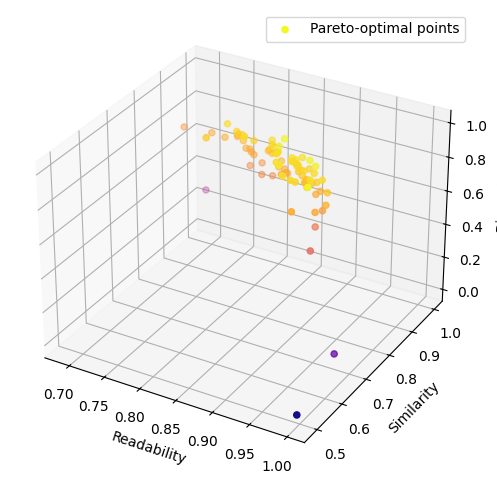

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

color_values = pareto_df["readability.norm"] + pareto_df["similarity.norm"] + pareto_df["diversity.norm"]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pareto_df["readability.norm"],
           pareto_df["similarity.norm"],
           pareto_df["diversity.norm"],
           c=color_values,
           cmap='plasma',
           label='Pareto-optimal points')

ax.set_xlabel('Readability')
ax.set_ylabel('Similarity')
ax.set_zlabel('Diversity')
plt.legend()
plt.show()

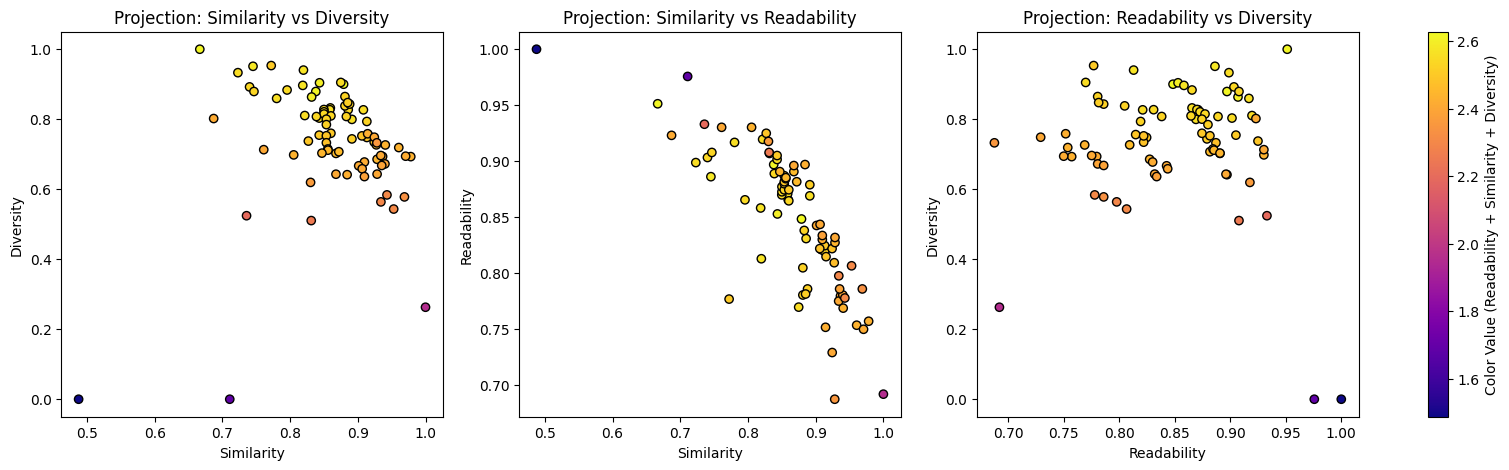

In [28]:
%matplotlib inline
# Create a figure with 3 subplots for 2D projections
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
scatters = []

# (1) Similarity vs Diversity
sc = axes[0].scatter(pareto_df["similarity.norm"], pareto_df["diversity.norm"], c=color_values, cmap='plasma', edgecolors='k')
axes[0].set_xlabel('Similarity')
axes[0].set_ylabel('Diversity')
axes[0].set_title('Projection: Similarity vs Diversity')
scatters.append(sc)

# (2) Similarity vs Readability
sc = axes[1].scatter(pareto_df["similarity.norm"], pareto_df["readability.norm"], c=color_values, cmap='plasma', edgecolors='k')
axes[1].set_xlabel('Similarity')
axes[1].set_ylabel('Readability')
axes[1].set_title('Projection: Similarity vs Readability')
scatters.append(sc)

# (3) Readability vs Diversity
sc = axes[2].scatter(pareto_df["readability.norm"], pareto_df["diversity.norm"], c=color_values, cmap='plasma', edgecolors='k')
axes[2].set_xlabel('Readability')
axes[2].set_ylabel('Diversity')
axes[2].set_title('Projection: Readability vs Diversity')
scatters.append(sc)

cbar = fig.colorbar(scatters[0], ax=axes, orientation='vertical', fraction=0.02, pad=0.05)
cbar.set_label('Color Value (Readability + Similarity + Diversity)')


# Adjust layout and show
plt.show()

### 3.2
**Question:**\
What is the max readability and semantic similarity independent of the
diversity?

We use the average of the two norms as score.

```df_results['score_similarity_readability'] = (df_results['readability.norm'] + df_results['similarity.norm']) / 2```


In [29]:
df_results['score_similarity_readability'] = (df_results['readability.norm'] + df_results['similarity.norm']) / 2

# sort by score descending
df_results.sort_values('score_similarity_readability', ascending=False).head(3)

,readability,similarity,diversity,readability.norm,similarity.norm,diversity.norm,score,score_similarity_readability
117,71.75,0.820717,0.629936,0.896992,0.884262,0.641526,0.807594,0.890627
2615,69.72,0.824718,0.730321,0.878981,0.891352,0.743759,0.838031,0.885167
2409,71.65,0.811413,0.631291,0.896105,0.867775,0.642906,0.802262,0.881940


Indeed, by sacrificing diversity we can achieve a higher score fo readability and similarity: 0.891

### 3.3 
**Question**\
What is the max diversity for (previously achieved) max semantic similarity (compromising readability)?

We sort the list by the similarity norm:

In [30]:
df_results.sort_values('similarity.norm', ascending=False).head(5)

,readability,similarity,diversity,readability.norm,similarity.norm,diversity.norm,score,score_similarity_readability
192,48.64,0.886034,0.258099,0.691953,1.000000,0.262847,0.651600,0.845976
34,30.03,0.882031,0.257583,0.526839,0.992908,0.262322,0.594023,0.759873
315,55.98,0.873746,0.680608,0.757076,0.978227,0.693130,0.809478,0.867651
186,49.96,0.873167,0.572442,0.703664,0.977201,0.582974,0.754613,0.840433
4,28.84,0.870643,0.000000,0.516281,0.972729,0.000000,0.496337,0.744505


Sorting by normed similarity and looking at the perfect maximum of 1.000, we get a diversity of 0.258.

Compromising slightly on similarity, picking the third entry at 0.978, we can achieve a diversity score of 0.693.